<a href="https://colab.research.google.com/github/retuyu88/digitalentkominfo/blob/master/Copy_of_%5B26_4%5D_Keras_dan_TensorFlow_ADF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

# Perkenalan Library

## Tensorflow

<img src="https://www.gstatic.com/devrel-devsite/va3a0eb1ff00a004a87e2f93101f27917d794beecfd23556fc6d8627bba2ff3cf/tensorflow/images/lockup.svg" alt="tensorflow" width="300px"/>

TensorFlow (https://www.tensorflow.org/) adalah *Deep Learning Library*, yang dikembangkan oleh Google Brain Team di dalam organisasi riset Google Machine Learning Intelligence, untuk keperluan melakukan pembelajaran mesin dan riset Jaringan Saraf tiruan.

TensorFlow menggabungkan berbagai teknik optimasi komputasional aljabar untuk memudahkan perhitungan berbagai ekspresi matematika yang akan sulit untuk dihitung.

**Fitur Utama Tensorflow*

* Mendefinisikan, mengoptimalkan, dan menghitung secara efisien ekspresi matematika yang melibatkan array multi-dimensi (tensor).
* Dukungan pemrograman dari jaringan saraf dalam dan teknik pembelajaran mesin.
* Penggunaan komputasi GPU dan optimalisasi memori secara otomatis.
* Skabilitas tinggi komputasi di seluruh mesin dan set data besar.

TensorFlow tersedia dengan dukungan Python dan C ++, tetapi Python API lebih didukung dan lebih mudah untuk dipelajari.

---

## Keras

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="keras" width="300px"/>

Keras (https://keras.io/) adalah library *Deep Learning Library* yang sangat modular dan minimalis, yang ditulis dengan Python dan mampu berjalan di atas TensorFlow atau Theano. Library ini dikembangkan dengan fokus pada memungkinkan eksperimen cepat.

Pada mulanya Keras dikembangkan untuk membantu pengguna agar dapat dengan mudah menggunakan *Deep Learning Library* Theano dan Tensorflow yang pada saat itu implementasinya sangat teknis dan rumit. 

Sejak Tensorflow versi 1.5, Keras diadopsi oleh Google dan sejak saat itu API yang telah dibangun sudah termasuk di dalam distribusi Tensorflow.

---

---
# Dataset MNIST

Sekarang kita akan membangun model Jaringan Saraf Tiruan menggunakan dataset paling populer digunakan saat belajar mengenai Pembelajaran Mesin: Dataset angka tulisan tangan MNIST

Jangan lupa, pastikan Colab ini berjalan dengan GPU


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)

---
## Load Dataset MNIST

Kelebihan menggunakan library seperti Keras dan TensorFlow adalah mereka sudah menyediakan banyak dataset contoh yang bisa langsung kita unduh dan gunakan

Link Dataset:
* [keras](https://keras.io/datasets/)
* [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)
* [tf.dataset](https://www.tensorflow.org/datasets/datasets)

Untuk itu, di sini mari kita unduh dataset mnist dari `tf.keras` sebagai berikut



In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28)
y_test.shape  = (10000,)


---
## Visualisasi Data MNIST
Tampilkan 20 citra pertama dari data lain `X_train`

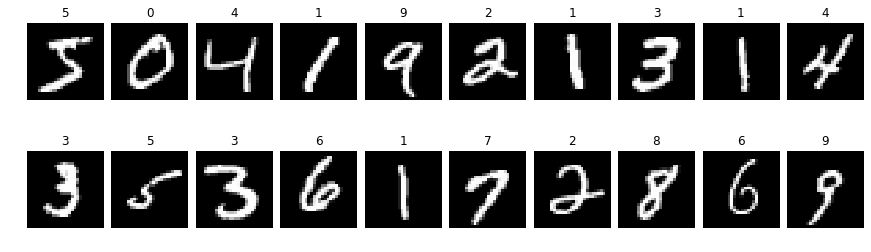

In [3]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10], cmap='gray')
        ax[j,i].set_title(y_train[i+j*10])
        ax[j,i].axis('off')
plt.show()

---
## Bagi Data Validasi
Ambil 10,000 data terakhir dari data latih menjadi data Validasi di dalam matrix `X_val` dan `y_val`

In [4]:
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 28, 28)
y_val.shape   = (10000,)
X_train.shape = (50000, 28, 28)
y_train.shape = (50000,)


---
## Normalizing Data
Normalisasi `X_train`, `X_val`, dan `X_test` dengan melakukan *zero-mean centering* 

In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


Jika kalian tertarik melihat bagaimana visualisasi data MNIST setelah dilakukan normalisasi *zero-mean centering*

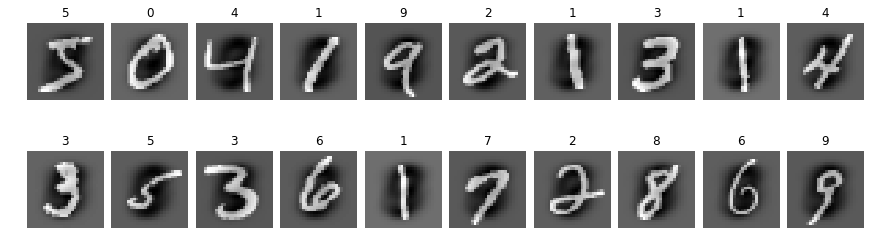

In [117]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10], cmap='gray')
        ax[j,i].set_title(y_train[i+j*10])
        ax[j,i].axis('off')
plt.show()

---
## One Hot Matrix



 Ubah vektor target `y_train`, `y_val`, dan `y_test` menjadi bentuk One-Hot Matrix

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train.ravel(), 10)
y_val_hot = to_categorical(y_val.ravel(), 10)
y_test_hot = to_categorical(y_test.ravel(), 10)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (50000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


contoh isi dari one hot matrix

In [9]:
print('\n         class:\ni | y |  0 1 2 3 4 5 6 7 8 9\n---------------------------------')
for i in range(10):
    print(i, '|', y_train[i], '|', y_train_hot[i,:].astype('int'))


         class:
i | y |  0 1 2 3 4 5 6 7 8 9
---------------------------------
0 | 5 | [0 0 0 0 0 1 0 0 0 0]
1 | 0 | [1 0 0 0 0 0 0 0 0 0]
2 | 4 | [0 0 0 0 1 0 0 0 0 0]
3 | 1 | [0 1 0 0 0 0 0 0 0 0]
4 | 9 | [0 0 0 0 0 0 0 0 0 1]
5 | 2 | [0 0 1 0 0 0 0 0 0 0]
6 | 1 | [0 1 0 0 0 0 0 0 0 0]
7 | 3 | [0 0 0 1 0 0 0 0 0 0]
8 | 1 | [0 1 0 0 0 0 0 0 0 0]
9 | 4 | [0 0 0 0 1 0 0 0 0 0]


---

# Two-Layer Neural Network

Berikutnya, mari kita bangun Jaringan Saraf Tiruan sedalam 2 layer untuk mengklasifikasikan dataset MNIST ini

Untuk kemudahan bersama, di sini kita akan gunakan API Keras untuk membangun arsitektur hingga melatih modelnya



---
## Import Modul

Untuk membangun Jaringan Saraf Tiruan sederhana, kita akan menggunakan model [`Sequential`](https://keras.io/models/sequential/) karena model hanya memiliki satu arah propagasi maju.

Layer-layer yang akan kita gunakan adalah:
* `Flatten`, untuk mengubah input data citra menjadi 1 kolom
* `Dense`, atau layer `Affine`
* `Activation`, untuk mendapatkan fungsi Aktivasi

Daftar layer lainnya dapat dilihat di [keras layers](https://keras.io/layers/core/) atau [tf.keras layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation


Berikutnya, kita definisikan paramtere arsitektur sebagai berikut

kita akan bangun jaringan saraf 2 layer dengan 512 neuron di hidden layer

In [0]:
num_data    = X_train.shape[0]
X_dim       = X_train.shape[1]
num_classes = y_train_hot.shape[1]

hidden_size = 512

---
## Membangun Model Jaringan menggunakan Keras

Keras adalah *Deep Learning* API yang dibangun sebagai *independent open source project* oleh lebih dari 700 kontributor. Selama pembangunannya hingga, Keras terus diperbarui sehingga sering terdapat perubahan di sisi teknis penulisan kode. Salah satunya adalah cara mendefinisikan model jaringan.


### Cara Pertama (OLD API)
Cara pertama membangun model, dan salah satu cara paling tua, menggunakan Keras adalah dengan menginisialisasi objek model `Sequential`, kemudian satu per satu kita tambahkan layer yang ingin kita tumpuk sebagai berikut


In [120]:
# create model old
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(hidden_size))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_size))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

    
  
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_7 (Activation)    (None, 10)               

### Cara Kedua (Compact API)

Update terbaru pada API layer Keras membuat kita bisa menambahkan fungsi aktivasi langsung dari layer `Dense` tanpa menambahkan layer `Activation`. Contohnya `Dense(512, activation="sigmoid")`

In [123]:
# create model new
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(hidden_size, activation='sigmoid'))
model.add(Dense(hidden_size, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
    
  
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Cara Ketiga (Functional API)
Cara ketiga membangun model adalah menggunakan Keras *functional API* yang memungkinkan kita membangun model yang lebih kompleks misalnya memiliki banyak output.

Berikut adalah contoh pembangunan model adalah menggunakan Keras *functional API*

In [14]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

# create model functional
inputs = Input(shape=(28, 28))
x = Flatten() (inputs)
x = Dense(hidden_size, activation="sigmoid")(x)
outputs = Dense(num_classes, activation="softmax")(x)


mdoel = Model(inputs, outputs)

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Cara Keempat (Constructor API)
Cara keempat adalah cara baru membangun `Sequential` model. Penggunaannya seperti cara pertama dan kedua, namun kita dapat langsung mendaftarkan layer-layernya ke dalam list saat inisialisasi objek Sequential sebagai berikut

In [124]:
# create model compact sequential

model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(hidden_size, activation="sigmoid"),
  Dense(hidden_size, activation="sigmoid"),
  Dense(num_classes, activation="softmax")
])


model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Keempat model di atas adalah model yang sama. Bisa dilihat dari summary arsitektur kegianya. Sekarang, pilih salah satu model untuk kita compile dengan fungsi *loss* dan metode optimasi. 

---
## Compile Model

Di sini kita harus mengkompile model dengan mendaftarkan fungsi loss dan fungsi optimasinya

### Fungsi Loss
terdapat berbagai jenis fungsi loss untuk bermacam kasus seperti 
* `categorical crossentropy` untuk klasifikasi multi kelas
* `binary crossentropy` untuk klasifikasi biner
* `mean squared error` untuk regresi
* dan banyak lainnya

lihat [keras losses](https://keras.io/losses/) atau [tf.keras losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) untuk lebih lanjut


### Fungsi Optimasi
Juga terdapat berbagai jenis fungsi optimasi seperti
* `sgd` untuk standar `stochastic gradient descent` dan `nesterov`
* `rmsprop` sebagai perkembangan dari `sgd`
* `adam` sebagai fungsi optimasi standar saat ini
* dan banyak lainnya

lihat [keras optimizers](https://keras.io/optimizers/) atau [tf.keras optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) untuk lebih lanjut

### Metrics
kita juga bisa menambahkan metric tambahan untuk melihat performa model selama pelatihan seperti metrik akurasi

In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])


---
## Melatih Model

Sekarang kita bisa melatih model dengan memanggil fungsi `fit`

Kita jalankan proses pelatihan untuk `epoch=15` dengan `batch size=100`

In [127]:
num_epochs = 15
batch_size = 100

model.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 - 1s - loss: 0.1938 - acc: 0.9479 - val_loss: 0.2354 - val_acc: 0.9299
Epoch 2/15
50000/50000 - 1s - loss: 0.1875 - acc: 0.9492 - val_loss: 0.2317 - val_acc: 0.9313
Epoch 3/15
50000/50000 - 1s - loss: 0.1817 - acc: 0.9513 - val_loss: 0.2297 - val_acc: 0.9326
Epoch 4/15
50000/50000 - 1s - loss: 0.1763 - acc: 0.9522 - val_loss: 0.2279 - val_acc: 0.9325
Epoch 5/15
50000/50000 - 1s - loss: 0.1713 - acc: 0.9539 - val_loss: 0.2255 - val_acc: 0.9341
Epoch 6/15
50000/50000 - 1s - loss: 0.1669 - acc: 0.9552 - val_loss: 0.2233 - val_acc: 0.9345
Epoch 7/15
50000/50000 - 1s - loss: 0.1623 - acc: 0.9566 - val_loss: 0.2216 - val_acc: 0.9351
Epoch 8/15
50000/50000 - 1s - loss: 0.1583 - acc: 0.9577 - val_loss: 0.2206 - val_acc: 0.9352
Epoch 9/15
50000/50000 - 1s - loss: 0.1545 - acc: 0.9590 - val_loss: 0.2196 - val_acc: 0.9351
Epoch 10/15
50000/50000 - 1s - loss: 0.1510 - acc: 0.9600 - val_loss: 0.2179 - val_acc: 0.9352
Epoch 11/

---
## Evaluasi Model
Berikutnya mari kita evaluasi akurasi dari model yang sudah dilatih

harusnya kita akan mendapatkan akurasi di atas `91%`

In [129]:
scores = model.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 1s 54us/sample - loss: 0.2229 - acc: 0.9341

Model Accuracy: 93.41%


---
# Pengujian Data Baru

Sekarang mari kita coba model yang sudah kita latih terhadap data baru

kita akan bangun fungsi untuk bisa menggambar di Google Colab ini dan memasukkan input gambar baru ke model

## Fungsi Menggambar pada Canvas

Jalankan cell di bawah untuk membangun fungsi menggambar

In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.jpg', w=300, h=300, line_width=20):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  print('gambar baru diterima')

---
## Input Gambar Baru
Sekarang, jalankan cell di bawah, lalu coba gambar (tuliskan) input angka baru

setelah selesai, klik tombol `Finish`

usahakan gambar angka cukup besar, namun tidak menyentuh garis tepi

In [131]:
draw()

gambar baru diterima


---
## Resize Data
Sekarang, ubah data menjadi Grayscale, dan resize data menjadi ukuran yang sama dengan data latih, yaitu `28x28`

ukuran awal =  (300, 300)
ukuran baru =  (28, 28)


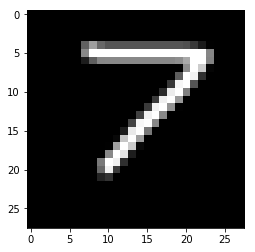

In [132]:
from PIL import Image
import cv2 as cv

new_img = Image.open('drawing.jpg')
new_img = np.array(new_img)[:,:,3]
print('ukuran awal = ',new_img.shape)

new_img2 = cv.resize(new_img, (28, 28),interpolation = cv.INTER_AREA) 
print('ukuran baru = ',new_img2.shape)

plt.imshow(new_img2, cmap='gray')
plt.show()

---
## Normalisasi Data
Jangan lupa, sebelum memasukkan data ke model untuk diprediksi, lakukan *zero-mean centering* menggunakan rata-rata data latih

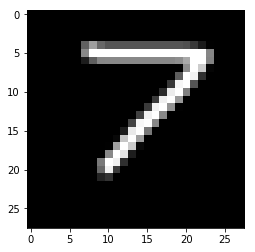

In [133]:
new_img3 = new_img2.astype('float32')
new_img3 -= mean_image

plt.imshow(new_img3, cmap='gray')
plt.show()

## Prediksi Data

Sekarang kita tinggal memprediksi data baru tersebut

Coba lihat, apakah model sudah pintar

jika belum, lanjutkan proses pelatihan dengan menjalankan cell yang memanggil fungsi `fit`

In [134]:
y_pred = model.predict(new_img3.reshape((1,28,28)))
print("Prediksi data baru: y = " + str(np.argmax(y_pred)))

Prediksi data baru: y = 8


<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>